# chapter 14 in chapter exercises

In [1]:
# import libraries 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.font_manager import FontProperties # for making tables
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM


In [2]:
# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

### Fig 14.3: Critical F by df's

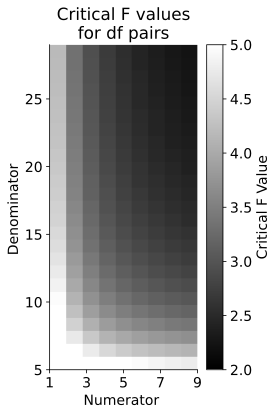

In [3]:
# define the degrees of freedom
df1_values = np.arange(1,10)
df2_values = np.arange(5,30)

# Create a 2D numpy array to store the critical F values
critFvals = np.zeros((len(df2_values),len(df1_values)))

# critical F values for each df pair
for i, df1 in enumerate(df1_values):
  for j, df2 in enumerate(df2_values):
    critFvals[j,i] = stats.f.ppf(.95, df1, df2)


# Plot the matrix as a heatmap
plt.figure(figsize=(4,6))
plt.imshow(critFvals, origin='lower', cmap='gray', interpolation='nearest',aspect='auto',
           extent=[df1_values[0],df1_values[-1],df2_values[0],df2_values[-1]],vmin=2,vmax=5)
plt.colorbar(label='Critical F Value')
plt.xlabel(r'Numerator ')
plt.ylabel(r'Denominator ')
plt.xticks(df1_values[::2])
plt.title(f'Critical F values\nfor df pairs',loc='center')

plt.tight_layout()
plt.show()
     

### Fig 14.4: F-distributions

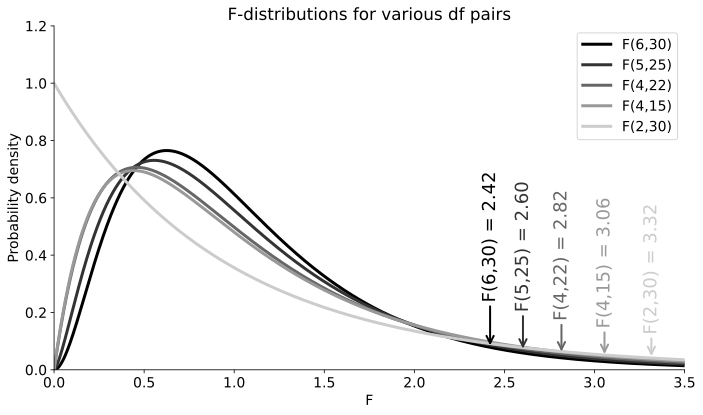

In [5]:
# x range
x = np.linspace(0,3.5,1000)

# degrees of freedom pairs
df_pairs = [(6,30), (5,25), (4,22), (4,15), (2,30)]



plt.figure(figsize=(10,6))
for i,(df1,df2) in enumerate(df_pairs):

  # F pdf
  F = stats.f.pdf(x, df1, df2)

  # color
  c = i/len(df_pairs)

  # plot 
  plt.plot(x,F,linewidth=3,color=(c,c,c),label=fr'F({df1},{df2})')

  # critical F value for p=.05
  crit_f_x = stats.f.ppf(.95,df1,df2) # this is the F value
  crit_f_y = stats.f.pdf(crit_f_x,df1,df2) # this is the y-axis coordinate (prob density)


  # annotation for the critical F value
  plt.annotate(text=fr'F({df1},{df2}) = {crit_f_x:.2f}',color=(c,c,c),xy=(crit_f_x,crit_f_y),rotation=90,
                xytext=(crit_f_x,crit_f_y*3),fontsize=18,
                arrowprops=dict(color=(c,c,c), arrowstyle='->',linewidth=2),
                ha='center', va='bottom')

# labels etc
plt.title('F-distributions for various df pairs',loc='center')
plt.xlabel('F')
plt.xlim([0,x[-1]])
plt.ylim([0,1.2])
plt.ylabel('Probability density')
plt.legend()

# display figure
plt.tight_layout()
plt.show()

### Fig 14.5: one way ANOVA table

In [6]:
# pending

### Fig 14.6: Bar plot used for Tukey test description

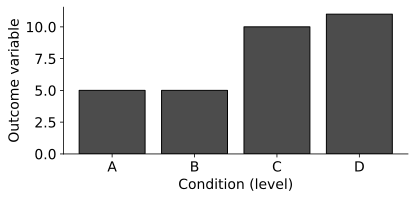

In [8]:
y = [ 5,5,10,11]
L = ['A','B','C','D']

plt.figure(figsize=(6,3))
plt.bar(range(len(L)),y,color=(.3,.3,.3),edgecolor='k')
plt.xticks(range(len(L)),labels=L)
plt.xlabel('Condition (level)')
plt.ylabel('Outcome variable')

# display figure
plt.tight_layout()
plt.show()